In [1]:
import networkx as nx

In [2]:
from graph_distance import GraphDistance

In [3]:
dataset='brightkite'

In [4]:
k=3

In [5]:
k_core_path=f'k_cores/{dataset}/{k}'

In [6]:
import math

In [7]:
import glob

In [8]:
import os

In [9]:
import os.path

In [10]:
m_values = [
    int(string_value)
    for string_value in os.listdir(f'detected_communities/{dataset}/{k}')
]

In [11]:
m_values_to_detected_community_paths = {}

for m_value in sorted(m_values):
    detected_community_path = f'detected_communities/{dataset}/{k}/{m_value}'
    detected_community = nx.read_adjlist(detected_community_path)
    if len(detected_community.nodes):
        m_values_to_detected_community_paths[m_value] = detected_community_path

In [12]:
m_values_to_detected_community_paths[math.inf] = k_core_path

In [13]:
import matplotlib.pyplot as plt

In [14]:
import array

In [15]:
import itertools

In [16]:
import more_itertools

In [17]:
m_values_to_pairwise_distances = {
    m_value: GraphDistance(detected_community_path)
    for m_value, detected_community_path
    in m_values_to_detected_community_paths.items()
}

In [18]:
import numpy as np

In [19]:
for m_value in m_values_to_pairwise_distances:
    m_values_to_pairwise_distances[m_value] = np.array(m_values_to_pairwise_distances[m_value], copy=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0040e9bd90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0040e3b490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0044dc85d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f0040e3bb50>,
 'fliers': [],
 'means': []}

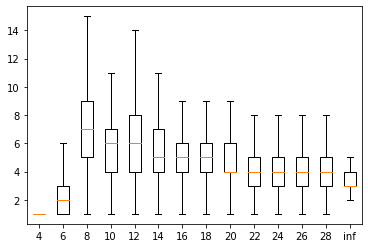

In [20]:
figure, axes=plt.subplots()

axes.boxplot(
    m_values_to_pairwise_distances.values(),
    labels=m_values_to_pairwise_distances.keys(),
    sym=''
)

In [21]:
figure.savefig(f'{dataset}-{k}-m_values_to_pairwise_distances.pdf')